# Linear Regression Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company needs help to sustain itself in the current market scenario. So, it has decided to devise a mindful business plan to accelerate its revenue when the ongoing lockdown ends and the economy restores to a healthy state.

***The company is interested on:***

- Predicting variables that are significant in the sharing bike demand.
- How well do those variables express the bike sharing demands


***Objective:***
- Build a model to find the variables significant in the bike sharing demand using the available independent variables.
- The management will use it to understand and manipulate the business strategy to meet the demand levels and customer expectations.

In [198]:
# Ignore statements warnings

import warnings
warnings.filterwarnings('ignore')

In [199]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Required Model Learning Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



## Step 1:  Load and Understand the Data Set

In [200]:
# Load the provided CSV file and review a few top rows
bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [201]:
# Display the dataframe shape
bike_sharing_df.shape

(730, 16)

In [202]:
# Check whether the dataframe has null value or not and it's column's datatype 
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [203]:
# Describe the numeric data columns to view the data spread in each numeric column
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [204]:
# Check the dataframe's columns 
bike_sharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Step 2 : Data cleanup


#### 2.1 Drop the columns those aren't useful for analysis

- `instant` variable is a identifier and won't helpful for analysis.
- `dteday` dteday needs to be removed because the date variable is not helpful for model training. Dataframe already has a month, year, and weekday in other columns, and we will not consider day-to-day trends in shared bike demand.
- `casual` and `registered` variables are not useful because the target variable `cnt` is available combine of both.

In [205]:
# Introduce a new column from `dteday` column days_old when this business started
bike_sharing_df['days_old'] = (
    pd.to_datetime(bike_sharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')
).dt.days

In [206]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


#### Drop the identified columns

In [207]:
# Dropping instant column as it can't help to predict anything with target variable
bike_sharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday because we have three transform columns, month, year, and weekday
bike_sharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns because we have cnt target variable combine of these two.

bike_sharing_df.drop(['casual'], axis = 1, inplace = True)
bike_sharing_df.drop(['registered'], axis = 1, inplace = True)

In [208]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [209]:
# Understand session and weathersit data
bike_sharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [210]:
bike_sharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [211]:
bike_sharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.272230e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.272230e-16,1.000000e+00,-5.149955e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.149955e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


- In Given dataset, `season`, `mnth`, `weekday` and  `weathersit` are an integer variable even though these variable should be non-numerical categories values.

#### 2.2 Handle missing values

In [212]:
# Check null values in each column
bike_sharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

- There are not missing values in the current dataset.

#### 2.3 Identify outlier and handle them

In [213]:
# List out th number of unique values in all columns
bike_sharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

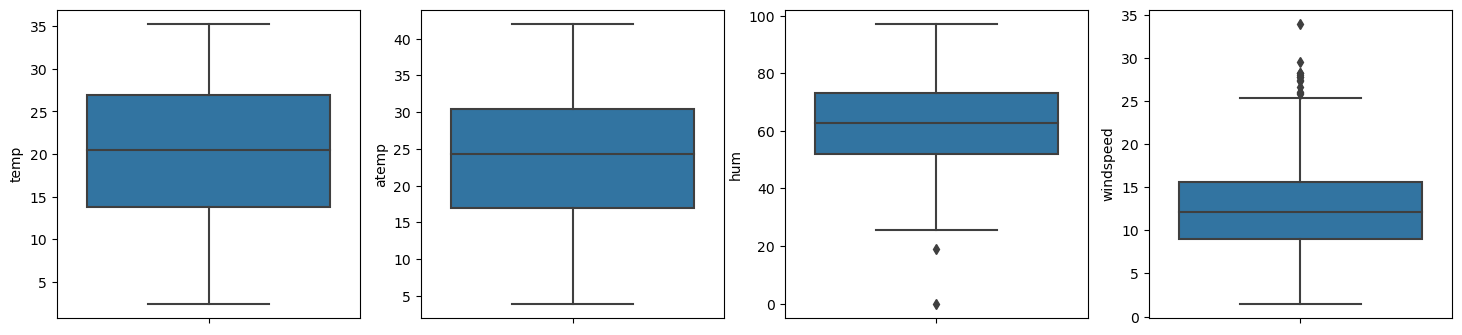

In [214]:
# Draw boxplots for independent variables with continuous values. Here are the identified variables - 

plt.figure(figsize=(18,4))
for idx, variable_name in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    plt.subplot(1, 4, (idx + 1))
    sns.boxplot(y = variable_name, data = bike_sharing_df)

- We can see the above box plots and no need to handle outliers.

## Step 3: EDA

#### 3.1 Transform season and  weathersit variables into categorical types

In [215]:
bike_sharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_sharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_sharing_df.mnth = bike_sharing_df.mnth.replace(
    {1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}
)

bike_sharing_df.weekday = bike_sharing_df.weekday.replace(
    {0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}
)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


#### 3.2 Render pairplots to review relationship b/w continuous numeric variables

<Figure size 1500x3000 with 0 Axes>

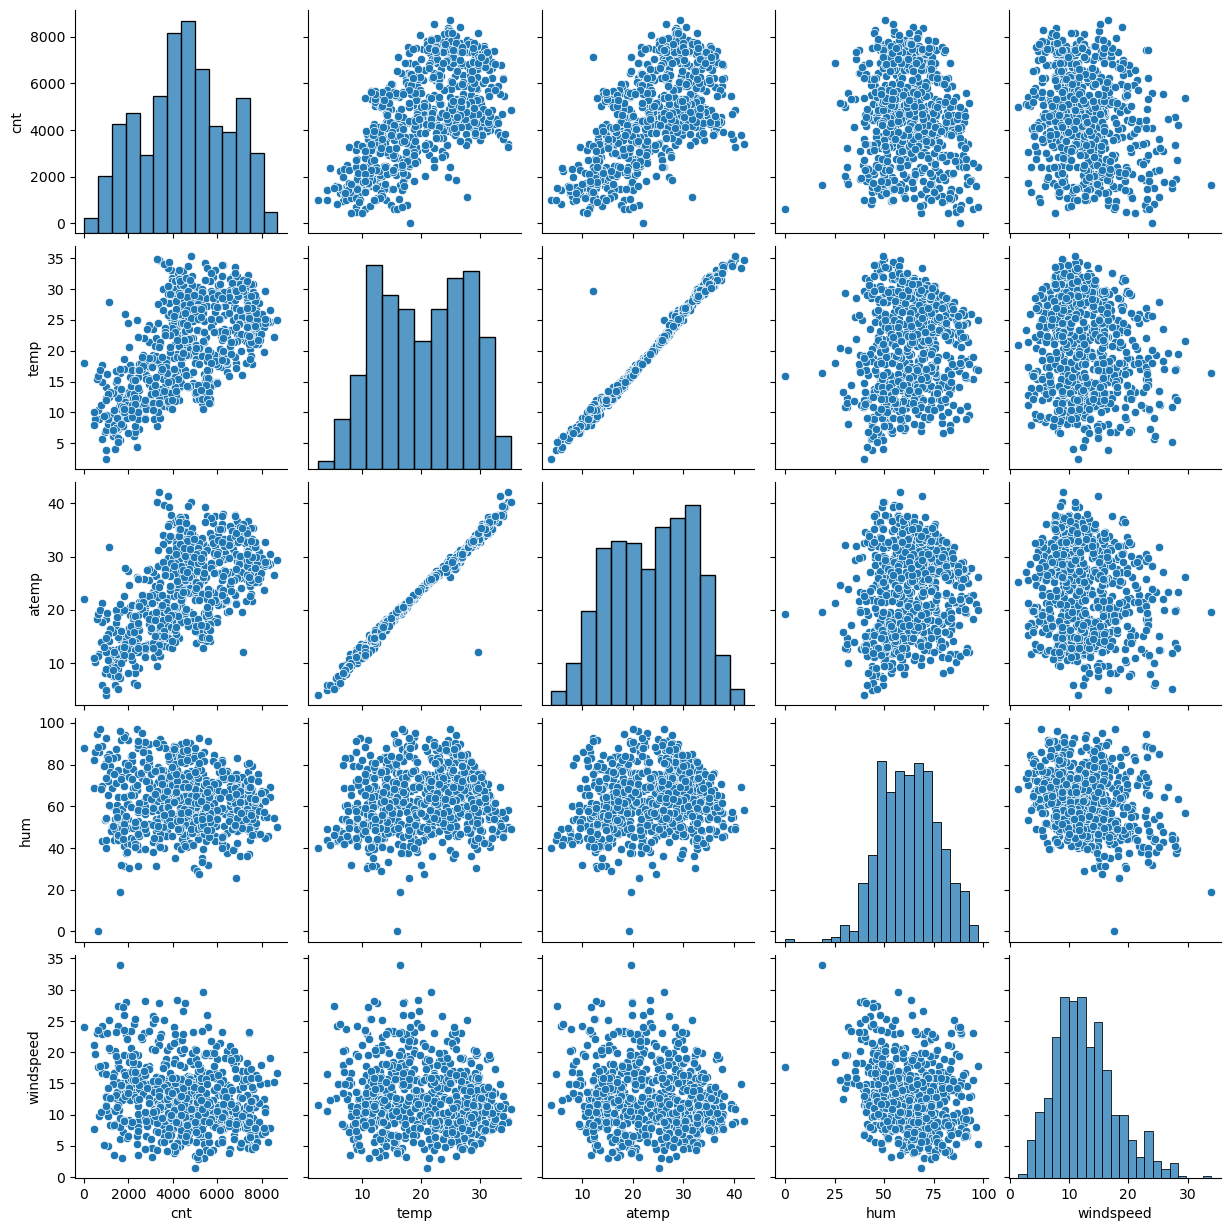

In [216]:
plt.figure(figsize = (15,30))
sns.pairplot(data = bike_sharing_df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### _`Inference`_: 
- It's clearly showing the graphs that `temp` and `atemp` have a high correlation against the target variable `cnt`
 

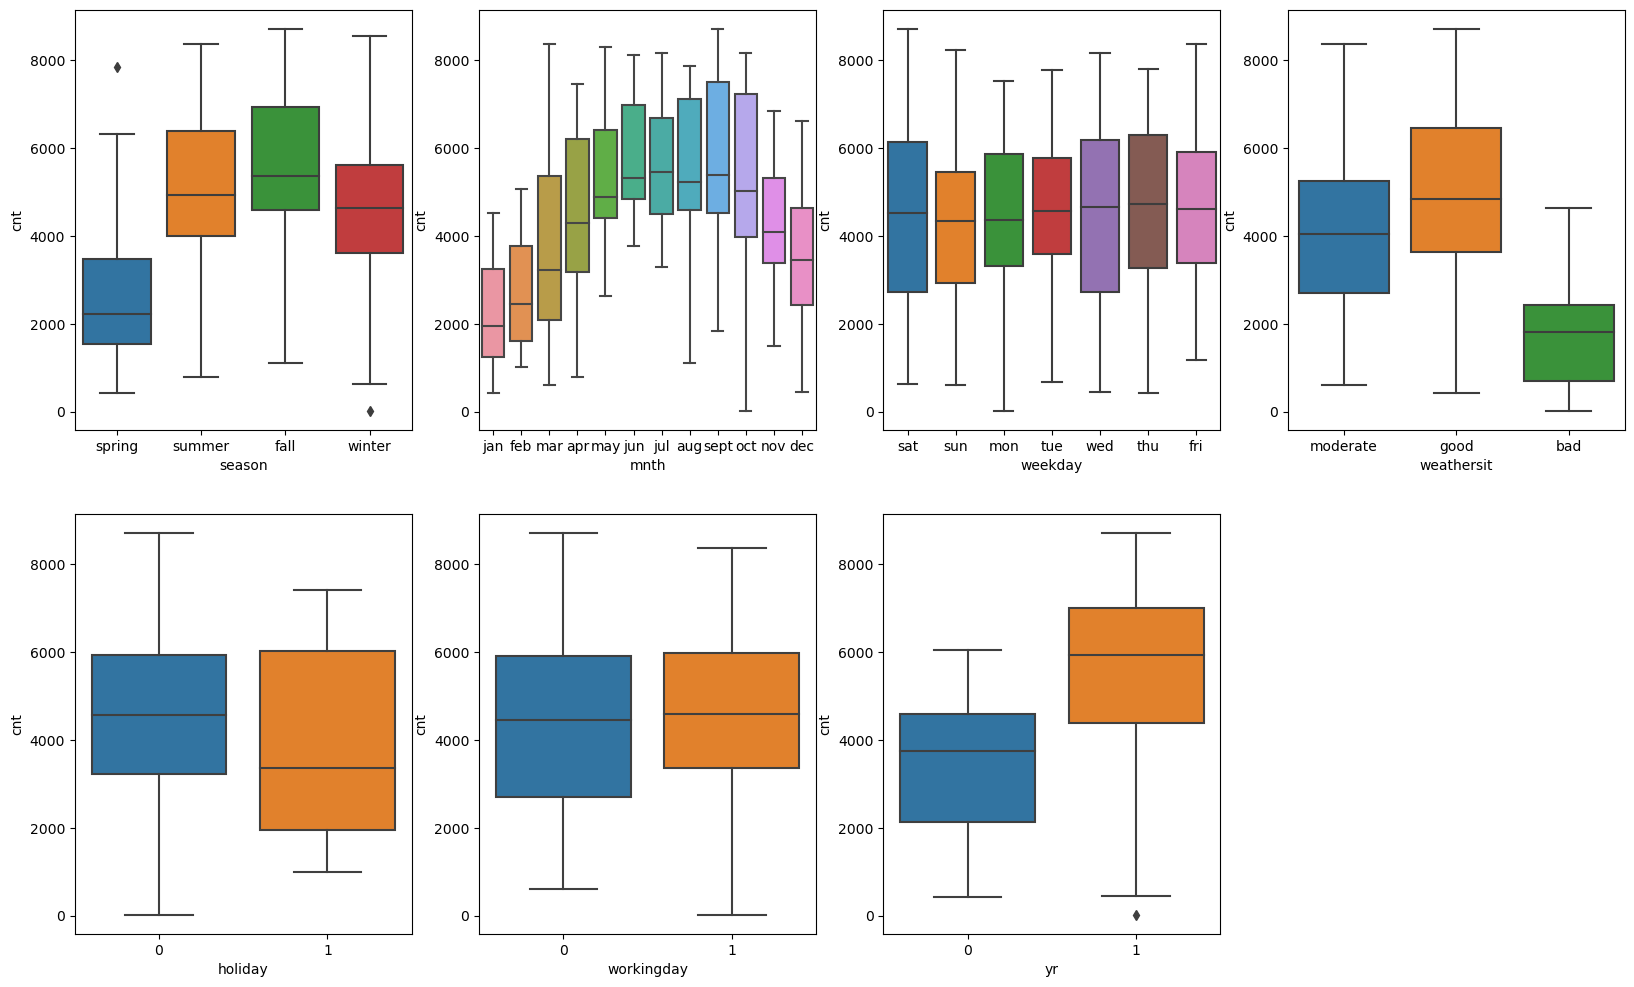

In [217]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
for idx, variable_name in enumerate(['season', 'mnth', 'weekday', 'weathersit', 'holiday', 'workingday', 'yr']):
    plt.subplot(2, 4, (idx + 1))
    sns.boxplot(x = variable_name, y = 'cnt', data = bike_sharing_df)
plt.show()

### Summary: 
    Here many insights can be drawn from the plots
    - Season fall has highest demand for rental bikes
    - Clearly yearly growth is showing in the above plots
    - Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
    - During holiday, the demand has decreased.
    - Weekday aren't giving clear picture of the demand.
    - When weather is good then the demand is high
    - During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

#### 3.3 Univariate and Bivariate Analysis

In [218]:
# Common function to create barplot related to categorical variables
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1, 2, 1)
    sns.barplot(data = bike_sharing_df, x = column, y= 'cnt')
    plt.subplot(1, 2, 2)
    sns.barplot(data = bike_sharing_df, x = column, y = 'cnt', hue = 'yr', palette = 'Set1')
    plt.legend(labels=['2018', '2019'])
    

    plt.show()

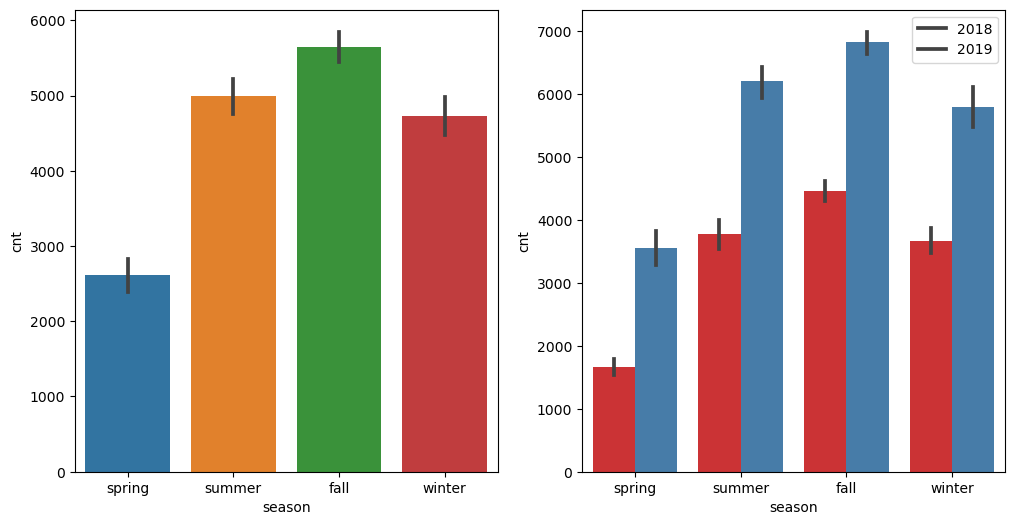

In [219]:
# Visualization analysis for season variable
plot_cat_columns('season')

 - Fall season is showing more booking compare to other seasons.
 - Booking count has shown a drastic increase trend from 2018 to 2019.

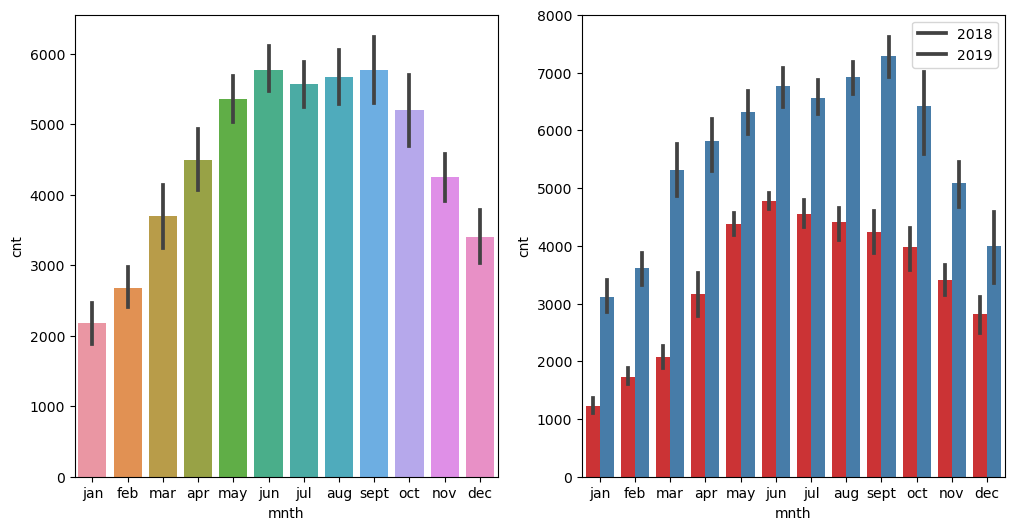

In [220]:
# Visualization analysis for month variable
plot_cat_columns('mnth')

- The above plot shows that the bookings have grown during May, June, July, Aug, September, and October.
- The increase trend is showing at the start of the year till mid and dip trend showing after that.
- Each month's booking number has increased from 2018 to 2019.

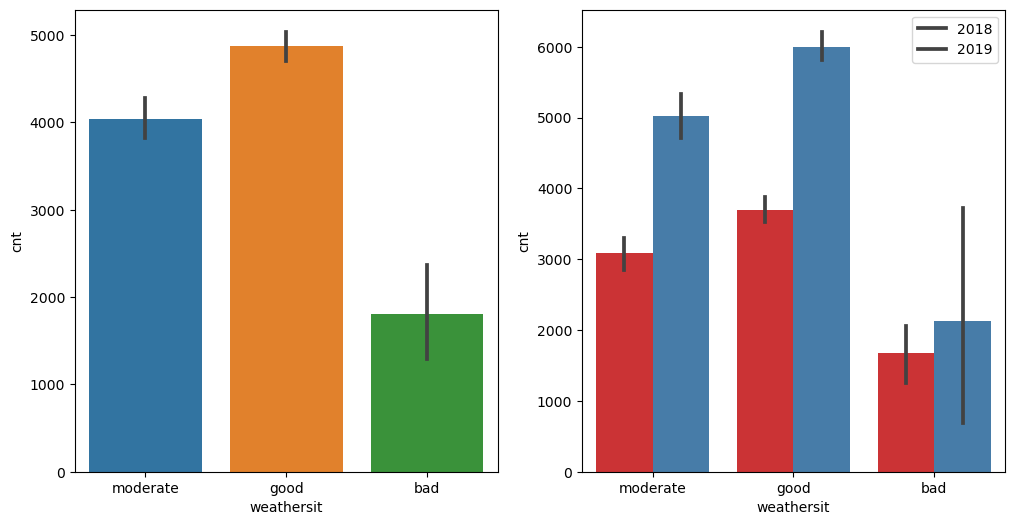

In [221]:
# Visualization analysis for weathersit variable
plot_cat_columns('weathersit')

- It's clearly showing that if the weather is good then more bookings.
- In all the weather, bookings are increasing compared to the previous year.

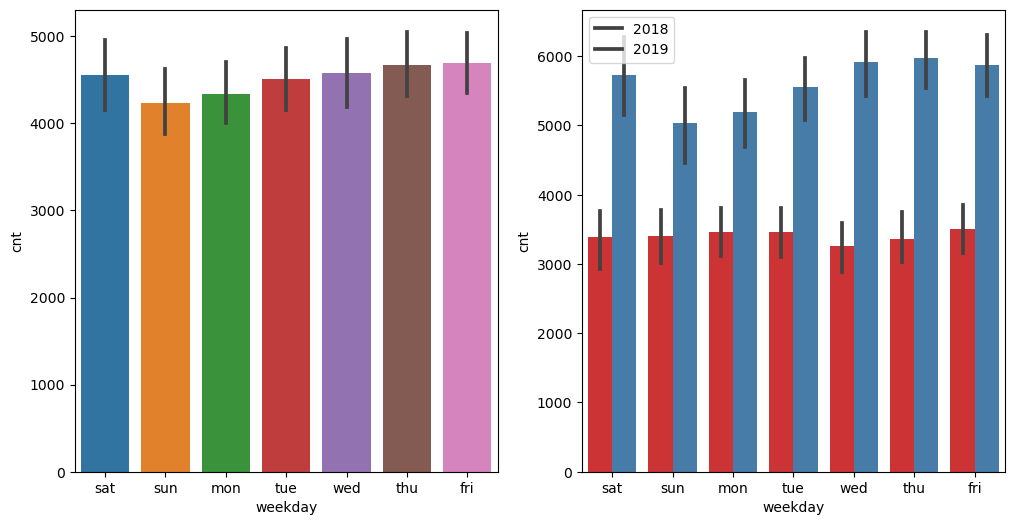

In [222]:
# Visualization analysis for weekday variable
plot_cat_columns('weekday')

 - Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

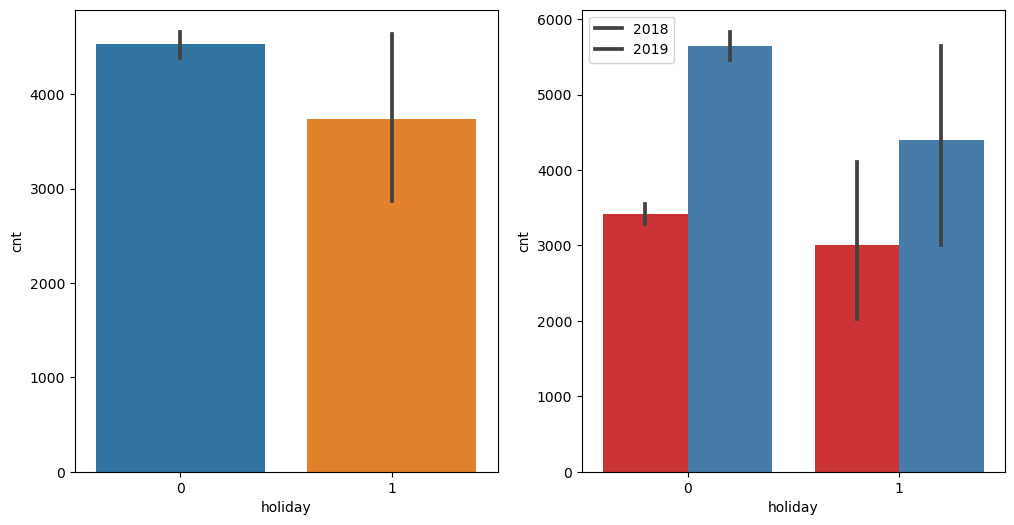

In [223]:
# Visualization analysis for holiday variable
plot_cat_columns('holiday')

- On holidays, the booking seems to less in numbers.
- Year wise growth are there in holidays as well.

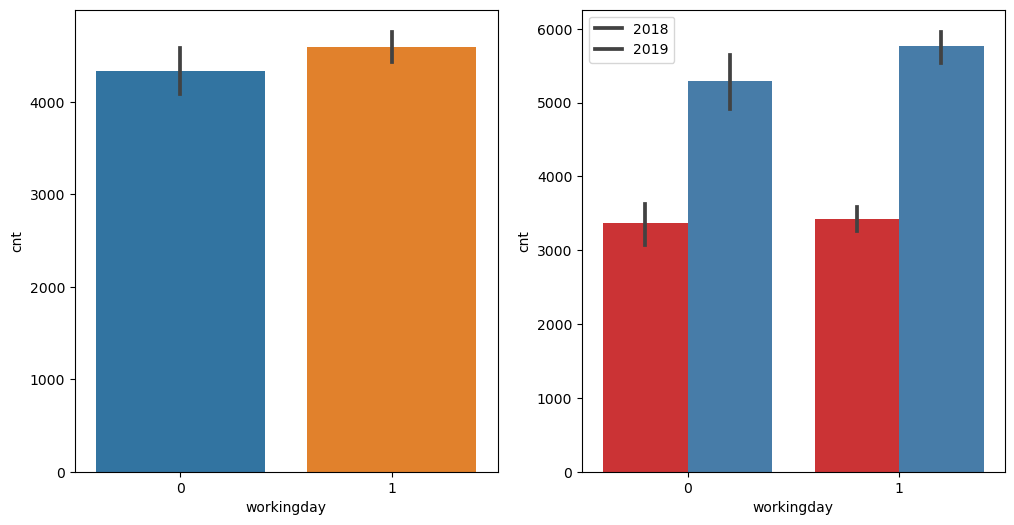

In [224]:
# Visualization analysis for workingday variable
plot_cat_columns('workingday')

- Booking on working or non-working days are close to the same. But, the count increased from 2018 to 2019.

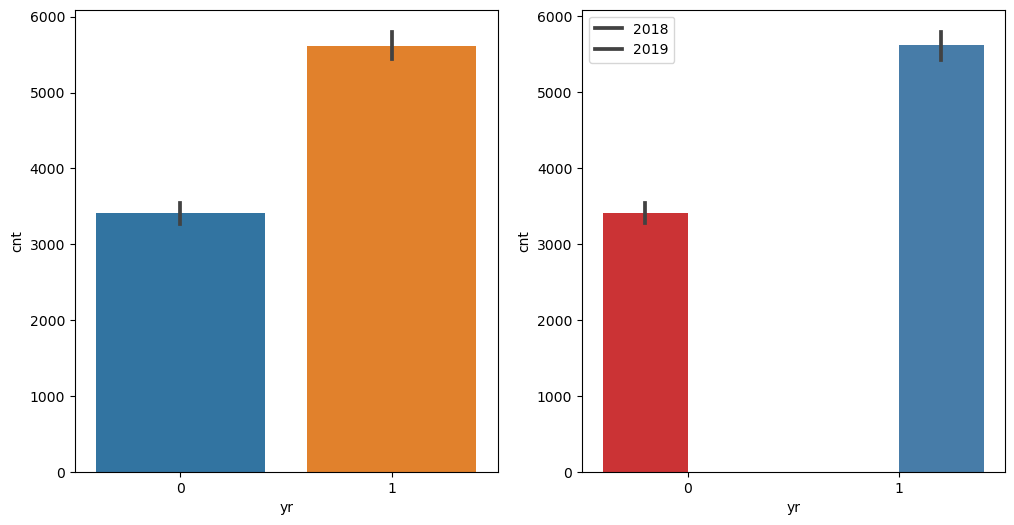

In [225]:
# Visualization analysis for year variable
plot_cat_columns('yr')

- 2019 attracted more bookings than the previous year, showing good business progress.

#### 3.4 Visualize Heatmap of correlation between variables

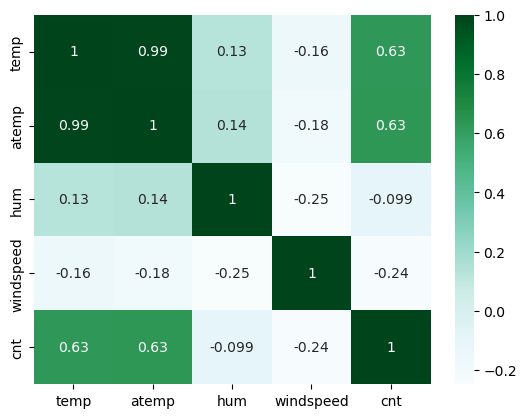

In [226]:
# Checking correlations between continuous variables
sns.heatmap(bike_sharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

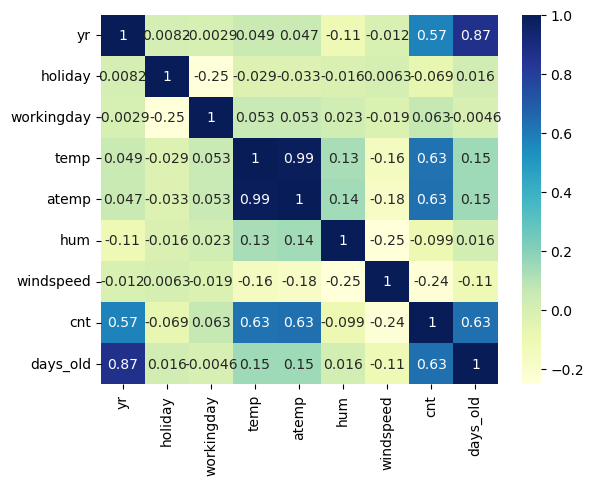

In [227]:
# Correlations between numeric variables
cor=bike_sharing_df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

- We can clearly see in the graph that temp and atemp are 99 percentage correlation to each other and consider to drop one of them.

##### 3.4 Linearity 

In [228]:
# Common function to render linear graph
plt.figure(figsize=(6,5), dpi = 110)
def render_regression_plot(x_variable, title, xlabel):
    plt.title(title, fontsize = 16)
    sns.regplot(data = bike_sharing_df, y = "cnt", x = x_variable)
    plt.xlabel(xlabel)
    plt.show()

<Figure size 660x550 with 0 Axes>

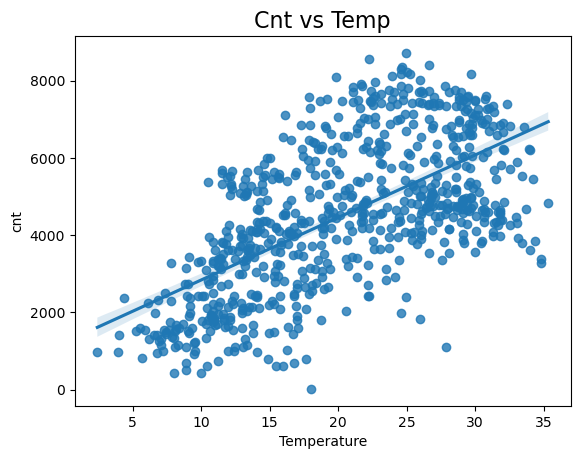

In [229]:
# Render linear regression plot for temp against target variable `cnt`
render_regression_plot("temp", "Cnt vs Temp", "Temperature")

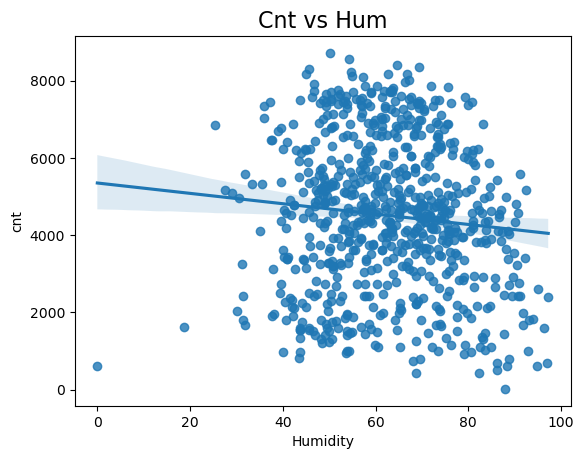

In [230]:
# Render linear regression plot for hum against target variable `cnt`
render_regression_plot("hum", "Cnt vs Hum", "Humidity")

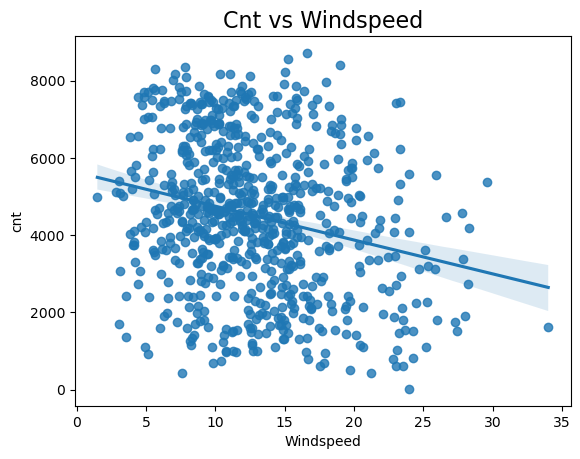

In [231]:
# Render linear regression plot for windspeed against target variable `cnt`
render_regression_plot("windspeed", "Cnt vs Windspeed", "Windspeed")

#### Summary:

- The linear plot shows increasing demand when temp increases.
- The linear plot shows decreasing trend when humidity increase.
- The linear plot shows decreasing trend when windspeed increase.

### 4. Data Preparation 

##### 4.1 Create dummy variables for all categorical variables


In [232]:
bike_sharing_df = pd.get_dummies(data=bike_sharing_df,columns=["season","mnth","weekday"],drop_first=True)
bike_sharing_df = pd.get_dummies(data=bike_sharing_df,columns=["weathersit"])

- First statement is dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [233]:
# Columns list after introducing dummy variables
bike_sharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [234]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


### 5. Model Building Process

#### 5.1 Split Provided Data set into training and test sets

In [235]:
# y variable is target variable and pull out in the y variable

y = bike_sharing_df.pop('cnt')

# X variable is complete dataset
X = bike_sharing_df

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [236]:
X_train.shape

(511, 31)

In [237]:
X_test.shape

(219, 31)

#### 5.2 Apply feature scaling on continuous variables

In [238]:
# List of continuous variable to scale
con_var_names = ['temp','atemp','hum','windspeed','days_old']

# Initiate instance for MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training dataset
X_train[con_var_names] = scaler.fit_transform(X_train[con_var_names])

In [239]:
# Data view after training set fit and transformation
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.3 Build a model using RFE automated approach

In [240]:
# Build a linear regression model using SKlearn

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [241]:
# Select 15 features using automated approach
rfe = RFE(lr, step = 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # List out selected variables

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 3),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', False, 3),
 ('mnth_aug', False, 3),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', False, 3),
 ('mnth_jul', False, 3),
 ('mnth_jun', False, 3),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 3),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 3),
 ('weekday_tue', False, 3),
 ('weekday_wed', False, 3),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

#### 5.4 Reject variables using manual approach

- Define a few functions to perform model building process

In [242]:
# Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [243]:
# Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [244]:
# Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [245]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['windspeed', 'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [246]:
# Taking 15 columns supported by RFE for regression
selected_15_vars = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
X_train_rfe = X_train[selected_15_vars]

In [247]:
X_train_rfe.shape

(511, 15)

### 6. Start Building Model

#### 6.1 Build Model -1 using RFE selected variables

In [248]:
# Build Model and list out VIF values
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          4.52e-183
Time:                        22:31:39   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

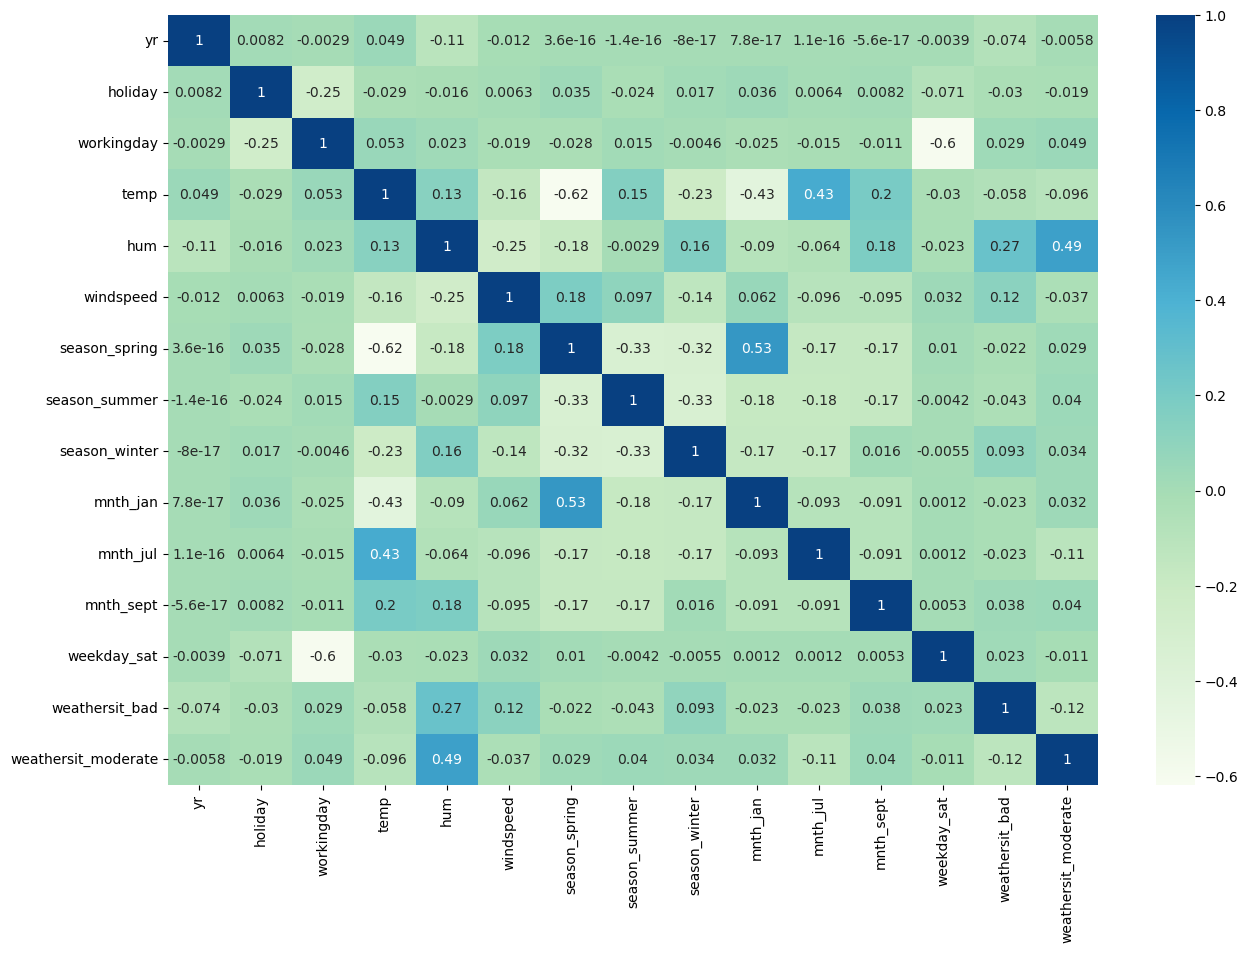

In [249]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_sharing_df[selected_15_vars].corr(), cmap='GnBu', annot=True)
plt.show()

#### 6.2 Build Model 2

- Drop mnth_jan variable which has negative cofficient and insignificant p-value

In [250]:
selected_15_vars.remove('mnth_jan')

In [251]:
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          3.59e-184
Time:                        22:31:39   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

#### 6.3 Build Model 3

- Drop all columns which has p-value > 0.5

In [252]:
selected_15_vars.remove('hum')

In [253]:
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.46e-181
Time:                        22:31:39   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

#### 6.4 Build Model 4

- Drop holiday variable which has negative cofficient and insignificant p-value

In [254]:
selected_15_vars.remove('holiday')

In [255]:
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          4.56e-182
Time:                        22:31:39   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

#### 6.5 Build Model 5

- Drop mnth_jul variable which has negative cofficient and insignificant p-value

In [256]:
selected_15_vars.remove('mnth_jul')

In [257]:
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.57e-182
Time:                        22:31:39   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

#### 6.6 Build Model 6

- Drop temp variable which has negative cofficient and insignificant p-value

In [258]:
selected_15_vars.remove('temp')

In [259]:
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.84e-150
Time:                        22:31:39   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

#### 6.7 Build Model 7

- Swapping july with spring because both were highly correlated

In [260]:
selected_15_vars.remove('season_spring')
selected_15_vars.append('mnth_jul')

In [261]:
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           3.93e-97
Time:                        22:31:39   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

#### 6.8 Build Model 8

- Remove windspeed with spring as windspeed was highly correlated with temp

In [262]:
selected_15_vars.append('season_spring')
selected_15_vars.remove('windspeed')

In [263]:
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          5.90e-146
Time:                        22:31:39   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

#### 6.9 Build Model 9

- using the weekend "Sunday" which was dropped during RFE instead of Saturday.

In [264]:
selected_15_vars.append('weekday_sun')
selected_15_vars.remove('weekday_sat')

In [265]:
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          6.32e-145
Time:                        22:31:39   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

#### 6.10 Build Model 10

- Add temp and removed season_summer and workingday

In [266]:
selected_15_vars.append('temp')
selected_15_vars.remove('season_summer')
selected_15_vars.remove('workingday')

In [267]:
build_model(selected_15_vars)
get_vif(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.33e-179
Time:                        22:31:39   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

### Summary of Model Building

- VIF values are in acceptable level
- p-value for all variables are closed to zero
- Achieved high R-Square, Adjusted R-Squared and F-statistic

In [268]:
# Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [269]:
# Build a model with above columns
lr = build_model_sk(X_train[selected_15_vars],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436198 [ 2001.88568746   494.76805882   483.00061976 -2305.32363933
  -665.38449026  -482.89359595 -1170.12801426  -335.8335287
  3917.73381585]


### 7. Model Evaluation

#### 7.1 Residucal Analysis

In [270]:
y_train_pred = lr.predict(X_train[selected_15_vars])

Text(0.5, 0, 'Errors')

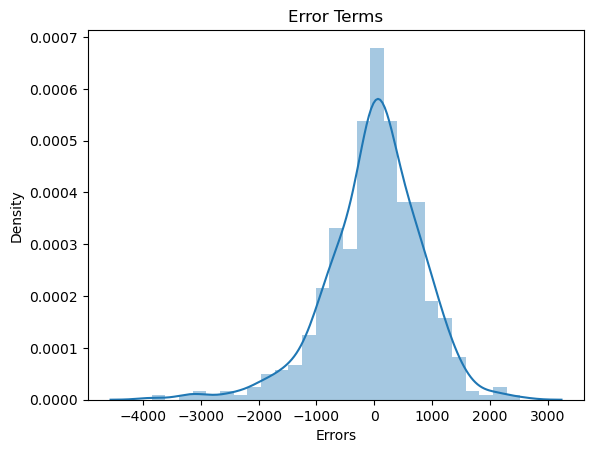

In [271]:
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

Errors are normally distributed in the above plot with mean 0. Everything is looking good.

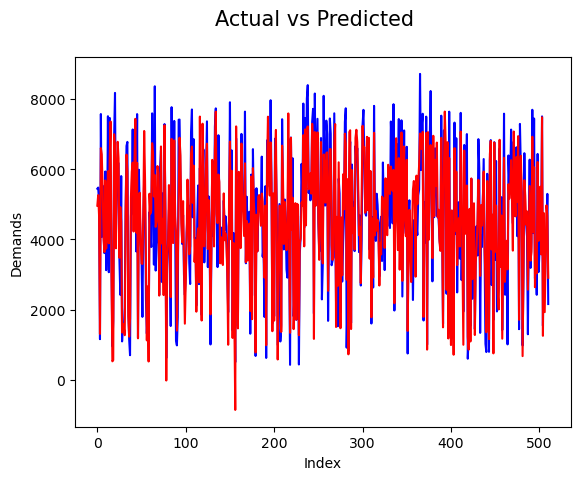

In [272]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual vs Predicted result following each other. It seems to model predicting well.

In [273]:
r2_score(y_train, y_train_pred)

0.8185359364498817

Final model R2 is same as the above result.

#### 7.2 Linearity 

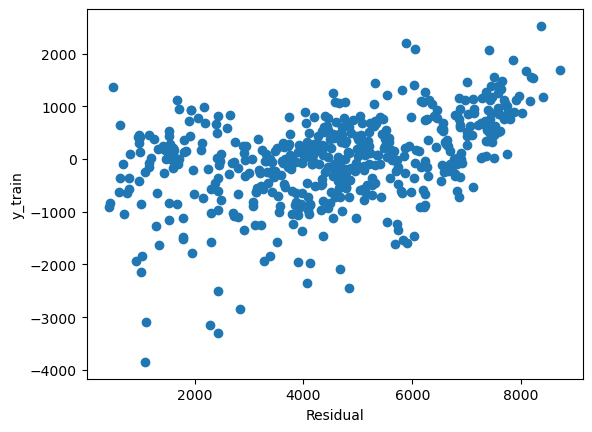

In [274]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### 7.3 Predict values for test data set 

In [275]:
# Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

# Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [276]:
# Predict the values for test data
y_test_pred = lr.predict(X_test[selected_15_vars])

#### 7.4 R-Squared value for test predictions

In [277]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8159036088393239

#### 7.5 Homoscedacity

Text(0, 0.5, 'y_test_pred')

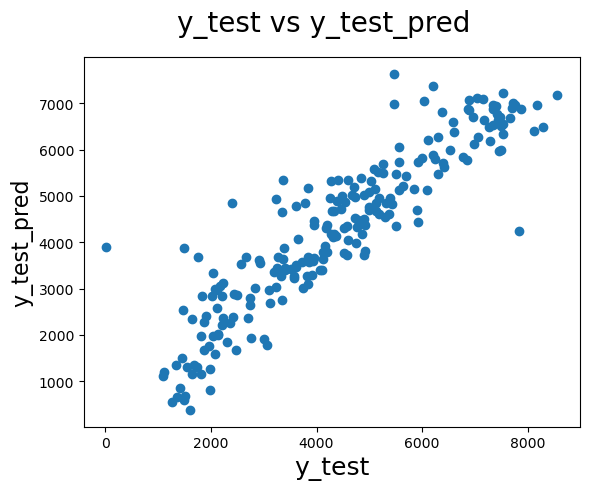

In [278]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

### 8. Model Prediction

In [279]:
lm = build_model(selected_15_vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.33e-179
Time:                        22:31:40   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

### Interepretation of results

### Here key takeway that the comapany should focus on the following features:
- Spring season is good for company expandation.
- September month is high demand month for bike sharing.
- Raining and Snowy session isn't favorable to the bike-sharing business.

### _`Conclusion`_
Here are the significant variables those predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)